# HOUSE PRICE PREDICTION

In [11]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 3.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.8 MB/s  0:00:01
   ---------------------------------------- 0.0/37.3 MB ? eta -:--:--
   - -------------------------------------- 1.6/37.3 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/37.3 MB 9.0 MB/s eta 0:00:04
   ------ -----------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [27]:

#Load the dataset
df = pd.read_csv('house_price_prediction_ML.csv')

In [28]:
df.head()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
0,1360,5,3,3,26,1,9,11312334
1,4272,2,1,1,21,0,6,15604278
2,3592,3,3,3,16,2,9,17113836
3,966,1,3,2,26,0,5,6975217
4,4926,2,3,1,28,0,1,16558138


In [29]:
df.tail()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
9995,2837,2,3,1,28,0,9,14443676
9996,1791,1,1,1,9,0,2,6734992
9997,2698,2,2,2,6,1,5,11421032
9998,1900,2,1,1,17,1,2,6888427
9999,3155,3,1,1,19,1,5,13733735


In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area_sqft       10000 non-null  int64
 1   Bedrooms        10000 non-null  int64
 2   Bathrooms       10000 non-null  int64
 3   Floors          10000 non-null  int64
 4   Age_of_House    10000 non-null  int64
 5   Garage          10000 non-null  int64
 6   Location_Score  10000 non-null  int64
 7   Price           10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [31]:
df.describe(include='all')

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Garage,Location_Score,Price
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2756.729500,2.983900,2.505500,2.00170,14.674800,1.005300,5.024500,1.293165e+07
std,1292.352479,1.413308,1.127252,0.81949,8.727019,0.815683,2.574522,4.098322e+06
min,501.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,3.026652e+06
25%,1624.000000,2.000000,1.000000,1.00000,7.000000,0.000000,3.000000,9.624321e+06
50%,2772.500000,3.000000,3.000000,2.00000,15.000000,1.000000,5.000000,1.295325e+07
75%,3873.000000,4.000000,4.000000,3.00000,22.000000,2.000000,7.000000,1.625145e+07
max,4999.000000,5.000000,4.000000,3.00000,29.000000,2.000000,9.000000,2.304416e+07


In [32]:
df.shape

(10000, 8)

In [33]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area_sqft       10000 non-null  int64
 1   Bedrooms        10000 non-null  int64
 2   Bathrooms       10000 non-null  int64
 3   Floors          10000 non-null  int64
 4   Age_of_House    10000 non-null  int64
 5   Garage          10000 non-null  int64
 6   Location_Score  10000 non-null  int64
 7   Price           10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [34]:
df.isnull().sum()

Area_sqft         0
Bedrooms          0
Bathrooms         0
Floors            0
Age_of_House      0
Garage            0
Location_Score    0
Price             0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

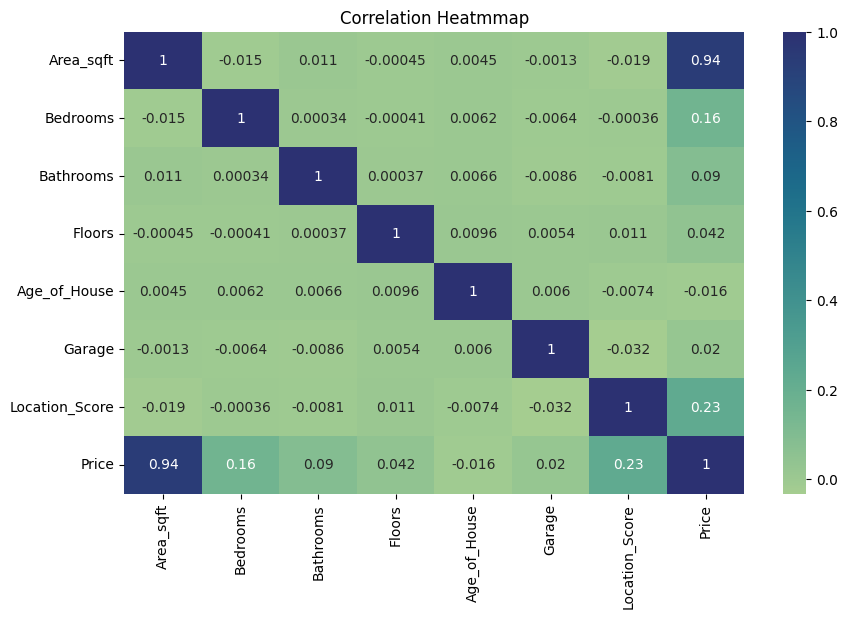

In [36]:
#Correlation heatmap(EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')
plt.title("Correlation Heatmmap")
plt.show()  


C:\Users\lenev\AppData\Local\Temp\ipykernel_30464\2874478391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='crest')


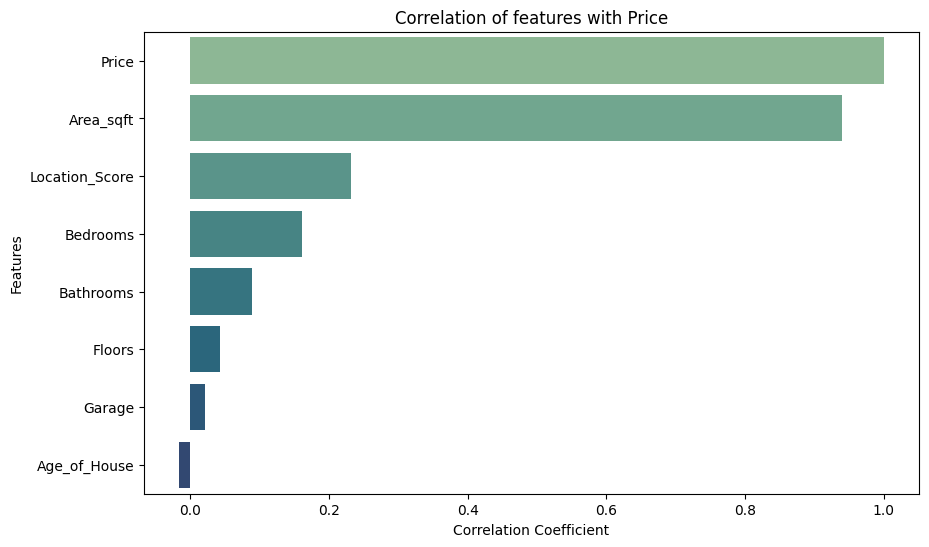

In [38]:
plt.figure(figsize=(10,6))
corr= df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette='crest')
plt.title("Correlation of features with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [39]:
#Define features and target
x= df.drop("Price", axis=1)
y= df["Price"]

In [40]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
    )

In [41]:
#Model Training
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [42]:
#Create models dictionary
models = {
    "Linear Regression": LinearRegression(),    
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
    }

In [43]:
#Train+Evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, model in models.items():
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model           MAE          RMSE  R2 Score
1              Ridge  3.998369e+05  5.020290e+05  0.984867
2              Lasso  3.998392e+05  5.020311e+05  0.984867
0  Linear Regression  3.998392e+05  5.020312e+05  0.984867
5  Gradient Boosting  4.239772e+05  5.282364e+05  0.983246
4      Random Forest  4.726034e+05  5.838542e+05  0.979532
6        Extra Trees  4.763863e+05  5.896114e+05  0.979126
3      Decision Tree  6.739562e+05  8.479221e+05  0.956830
8                KNN  9.956779e+05  1.238367e+06  0.907920
7                SVR  3.461505e+06  4.080554e+06  0.000216


In [44]:
#Pick Best Model
best_model_name = results_df.iloc[0]["Model"]
best_model= models[best_model_name]
print(f"\n Best Model: {best_model_name}")


 Best Model: Ridge


In [54]:
# Save Best Model
import os
import pickle

# Check current working directory
print("Current Working Directory:", os.getcwd())

# Save inside model folder
file_path = os.path.join(os.getcwd(), "model.pkl")

with open(file_path, "wb") as f:
    pickle.dump(model, f)

print(f"Best Model saved to {file_path}")

Current Working Directory: c:\Users\lenev\Downloads\HousePricePrediction
Best Model saved to c:\Users\lenev\Downloads\HousePricePrediction\model.pkl


In [53]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
